In [1]:
# 패키지 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
df = pd.read_csv("glass.csv")

# 데이터 확인
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# 데이터 scale 정규화

# 차원축소할 컬럼만 선택(종속변수 Type 제거)
df1 = df.drop('Type', axis = 1)

# 데이터 정규화
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 컬럼명 결합
df_minmax = pd.DataFrame(data = df_minmax, columns = df1.columns)
df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


표준화 등 다른 스케일링 방법을 적용해도 됩니다.
(정규화를 하는 이유는 변수들 간의 스케일 차이가 클 경우 분산이 큰 변수가 주성분에 과도하게 영향을 많이 주게 되기 때문에)

### 9개의 주성분 생성 후 설명력 확인

In [4]:
# 주성분 개수 설정(최대 수 설정)
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data = df_pca,
                      columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])

# 주성분 설명력 확인
np.round_(pca.explained_variance_ratio_, 3)

array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

위 각 수치는 주성분의 설명력을 의미하며, 모든 주성분의 설명력 총 합은 100%입니다.

### 2개의 주성분 생성

In [5]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data = df_pca
                      , columns = ['C1', 'C2'])

df_pca.head()

,C1,C2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


약 63%의 설명력을 가지는 두 개의 주성분까지 생성하여 테이블을 생성합니다. 이로써 기존의 9개의 변수를 2개의 변수로 차원축소를 했습니다.

### 주성분에 따른 종속변수(Type) 시각화

<AxesSubplot:xlabel='C1', ylabel='C2'>

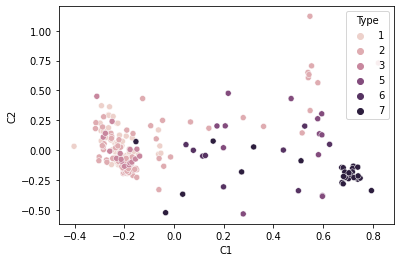

In [6]:
# 주성분 테이블에 종속변수 컬럼 결합
df_concat = pd.concat([df_pca, df[['Type']]], axis = 1)

# scatter plot visualization
sns.scatterplot(data = df_concat, x='C1', y='C2', hue = 'Type')

제1주성분과 제2주성분을 x축과 y축으로 하여 종속변수인 Type이 어떻게 분포하는지 확인합니다.  
Type 7의 경우 제1주성분이 0.6 ~ 0.8이며 제2주성분이 -0.5 ~ 0인 영열게 주로 분포해 있습니다.  
이처럼 2개의 주성분으로 분류 성능을 가지고 있는 것을 확인할 수 있습니다.